## Imports

In [50]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

In this lab, we are describing how the emission levels of the top 10 emitters of co2 have changed from 1971 to 2020 using the greenhouse gas emission data set.

The data set is a collection of key metrics maintained by our World in Data. This is regularly updated and includes data on co2 omission. The link for the source is : https://ourworldindata.org/co2-and-greenhouse-gas-emissions . It was dowmloaded fourth months ago ( approximately December 2022).

## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/Michee25/co2-emission as a `DataFrame`. Name the `DataFrame` `df`.

##### Solution

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Michee25/co2-emission/main/owid-co2-data.csv')

print(df.columns)


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [3]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

In [4]:
df = df.loc[df['country'].isin(non_countries) == False]


This code allows to remove all the rows that are not countries in our data .For example: North America

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

##### Solution

In [5]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

##### Solution

In [6]:
df.info()
#1. Yes. For example, population should not be decimals(int)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

In [7]:
df.isna().sum()
#2. Yes, there are some columns with missing values.

country                         0
year                            0
iso_code                      387
population                   3585
gdp                         25103
                            ...  
share_global_other_co2      38018
total_ghg                   33819
total_ghg_excluding_lucf    33819
trade_co2                   35908
trade_co2_share             35909
Length: 74, dtype: int64

##### $\rightarrow$ What years are present in the data set?

##### Solution

In [8]:
df.loc[:, ["year"]]

,year
0,1850
1,1851
2,1852
3,1853
4,1854
...,...
46518,2017
46519,2018
46520,2019
46521,2020


This code displays the years that are present in the data set.

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

In [62]:
df.sort_values(by='co2', ascending=False).loc[df['year'] == 2020 ][['country', 'co2']].head(10)

,country,co2
8989,China,10956.213
44221,United States,4715.691
20136,India,2445.012
35053,Russia,1624.221
21756,Japan,1042.224
20552,Iran,729.978
36664,Saudi Arabia,661.193
16794,Germany,639.381
20308,Indonesia,609.786
39259,South Korea,597.634


The output of the code above shows to us the top 10 emitters of total CO2 in 2020. We had to use the sort_values method to filter columns that were not necessary. 

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

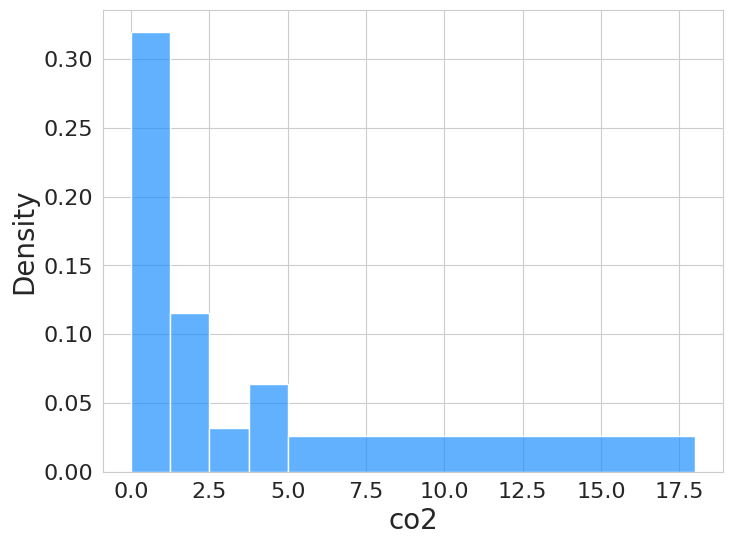

In [17]:
# Set the figure size
plt.figure(figsize = (8,6))

# Produce the histogram
sns.histplot(data = df[df['year'] == 2020], x = 'co2',  bins = np.r_[np.linspace(0, 5, 5), 18], color = 'dodgerblue', alpha = 0.7, stat = 'density')

# Label the axes
plt.ylabel('Density',fontsize = 20)
plt.xlabel('co2',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The histogram shows us that the distribution is skewed.

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

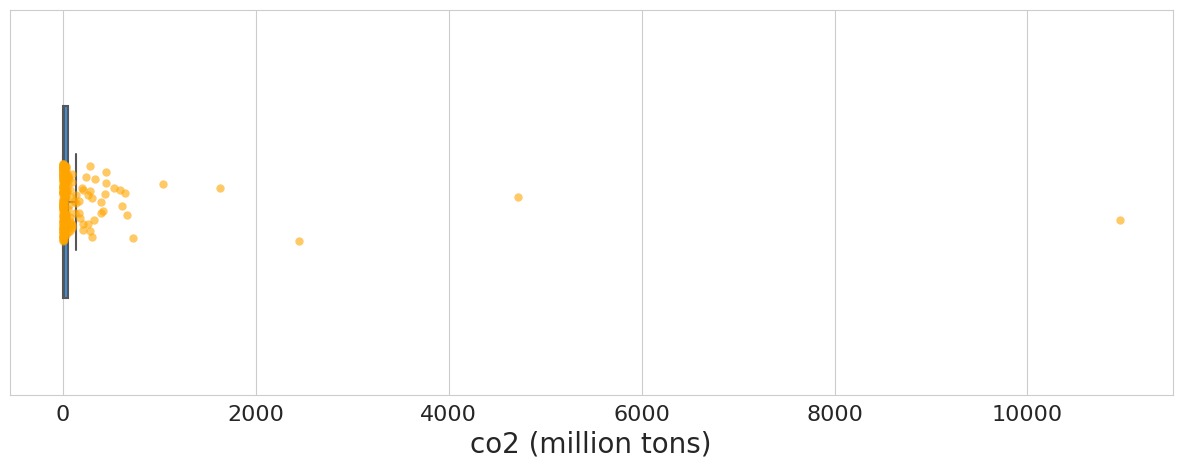

In [27]:
# Figure size
plt.figure(figsize = (15,5))

# Use Seaborn to make the boxplot, but don't show outliers (fliersize = 0)
sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)

# Use Seaborn to make the swarm plot
sns.stripplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

# Label axes
plt.xlabel('co2 (million tons)', fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

From the boxplot, we can notice that the top 10 emitters are outliers.

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

##### Solution

#Yes, Based on data in the boxplot, the Co2 emissions of the top 10 emitters in 20200 outliers in the distribution.

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

##### Solution

In [46]:
top10 = df.sort_values(by='co2', ascending=False).loc[df['year'] == 2020 ]['country'].head(10)
emmiters = top10.tolist()
df_years = df.loc[(df['year'] < 2020) & (df['year'] > 1971)]
df_years_countries = df_years.loc[df_years['country'].isin(emmiters) == True]
df_years_countries['co2'].isna().sum()



0

#No, there is not any missing CO2 emission values for the top 10 emitters in 2020 over the years 1971 to 2020.


##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

##### Solution

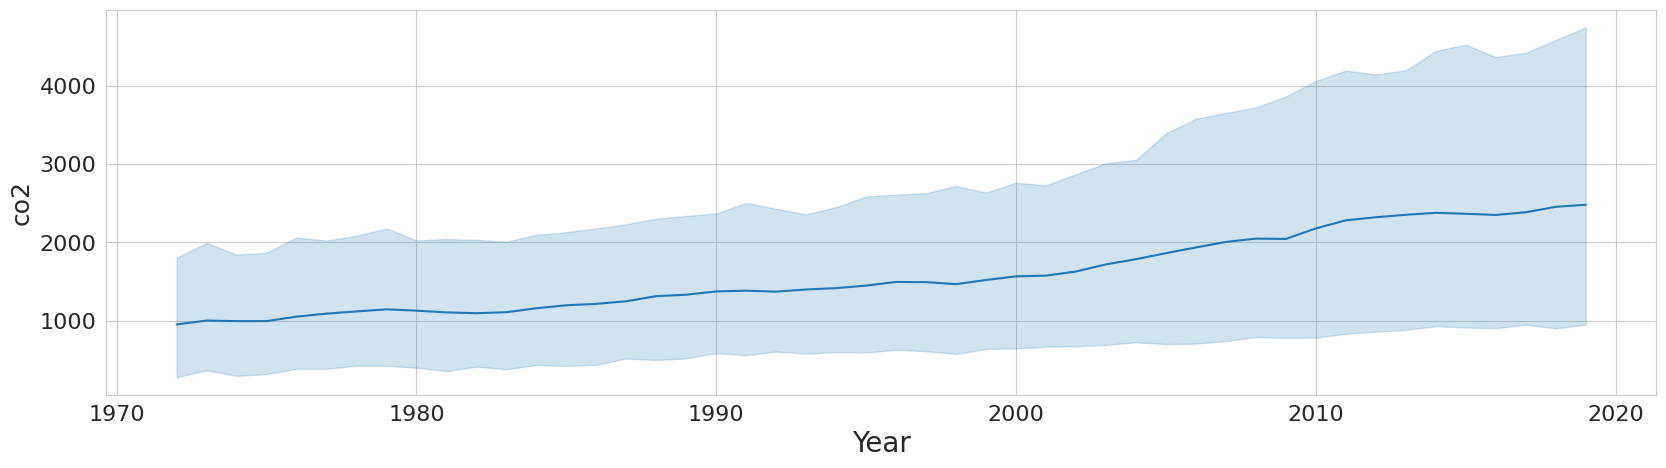

In [52]:
plt.figure(figsize=(20,5))
sns.lineplot(data= df_years_countries, x='year', y='co2')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2', fontsize = 18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The time plot diplays a curve that is increasing with time.

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

<ipython-input-58-ac515a137ad9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df_years.groupby('country').mean(),


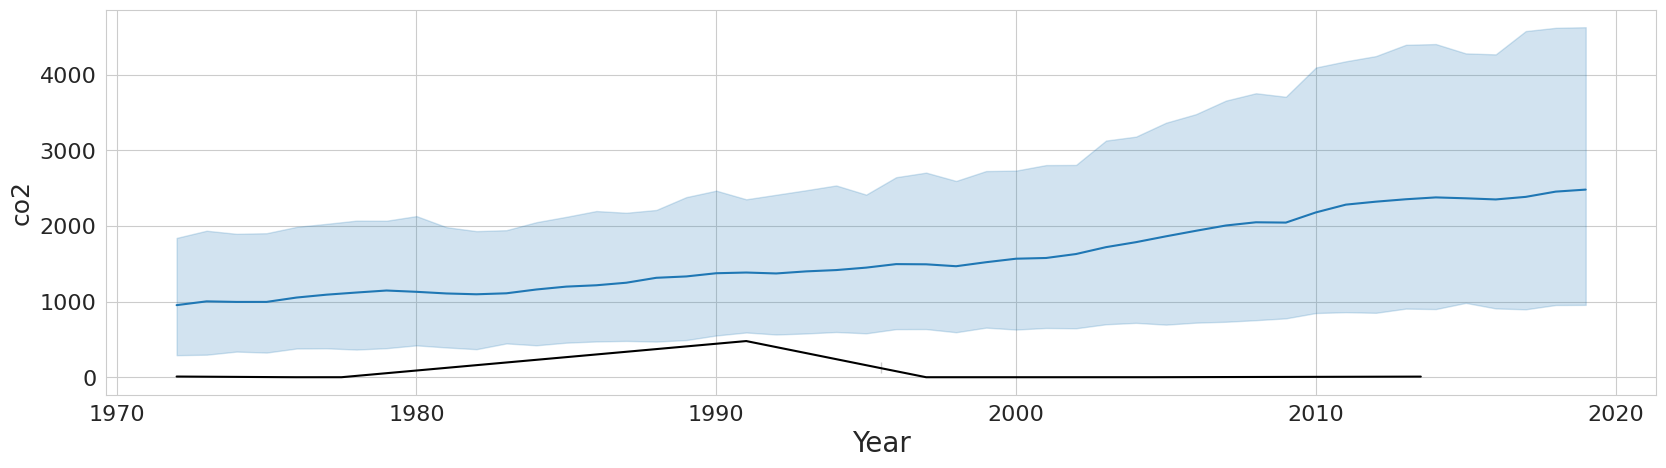

In [58]:
plt.figure(figsize=(20,5))
sns.lineplot(data= df_years_countries, x='year', y='co2')

sns.lineplot(data = df_years.groupby('country').mean(),
             x = 'year',
             y = 'co2',
             color = 'k')
plt.tick_params(labelsize = 12)



plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2', fontsize = 18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

<ipython-input-61-ceb66bc889bf>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df_years.groupby('country').mean(),


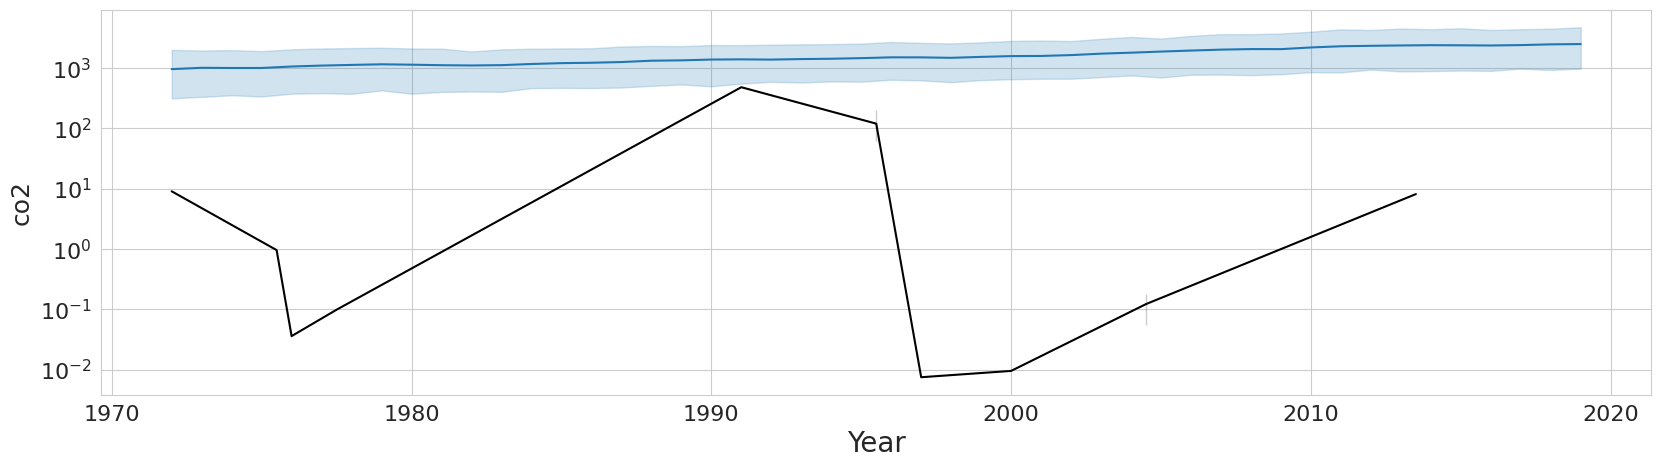

In [61]:
plt.figure(figsize=(20,5))
sns.lineplot(data= df_years_countries, x='year', y='co2')

sns.lineplot(data = df_years.groupby('country').mean(),
             x = 'year',
             y = 'co2',
             color = 'k')
plt.tick_params(labelsize = 12)



plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2', fontsize = 18)
plt.yscale("log")

# Set sizes of tick labels
plt.tick_params(labelsize = 16);


##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

The trend in CO2 emissions from these countries over the last 50 years follows an increasing path.